# Global Health Analysis: Predicting Life Expectancy
### Machine Learning Regression Project
**Author:** Juan Manuel Candela | **Date:** March 2026
**Dataset:** Life Expectancy Data

---

##  1. Project Overview
This project implements a regression to predict life expectancy using **Multiple Linear Regression (MLR)** and **Support Vector Regression (SVR)** with scikit-learn.

## Includes
- Reading and cleaning CSV data
- Handling missing values with mean imputation
- One-hot encoding for categorical variables
- Train–test split
- Feature scaling with StandardScaler
- Multiple Linear Regression model
- Support Vector Regression with GridSearchCV
- Model evaluation using MSE and R2
- Scatter plots comparing real vs predicted values (MLR vs SVR)

## Libraries

In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Exploratory Data Analysis (EDA) & Data Preprocessing & Cleaning

In [7]:
# Read cvs
df = pd.read_csv("Life Expectancy Data.csv")

In [8]:
# Remove whitespace
df.columns = df.columns.str.strip()

# Remove unnecessary data
df = df.drop(["Country"], axis=1)

# Save categoric columns
df_cat = df["Status"]

# Save num_columns
num_columns = df.drop(["Status"], axis=1).columns

In [9]:
# Data Imputation
from sklearn.impute import SimpleImputer
# Apply imputer on numeric data
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
# Keep pandas DataFrame
df_num = pd.DataFrame(imputer.fit_transform(df[num_columns]), columns=num_columns, index=df.index)

# Insert categoric columns
df_num.insert(1, "Status", df_cat)

# Get_Dummies
df = pd.get_dummies(df_num)

# Save target
y = df["Life expectancy"]
# Save features and remove target from it
X = df.drop(["Life expectancy"], axis=1)

##  3. Model Development
We will implement a **Linear Regression** and **Support Vector Regression** models as our baseline. We will perform a **Train-Test Split (80/20)**.

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #X:Features / y:target / test_size: 20% test 80% train /  random_state:seed

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train.iloc[:,:-2] = sc.fit_transform(X_train.iloc[:,:-2]) # array[row, column]
X_test.iloc[:,:-2] = sc.transform(X_test.iloc[:,:-2])

# Multiple Linear Regression

In [12]:
def multiple_linear_regression(X_train, X_test, y_train, y_test):
    # Multiple Linear Regression, I will train the linear regression. To do so we use a scikit-learn module
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Coefficients
    coef = lr.coef_

    # Intercept
    intercept = lr.intercept_


    # Prediction
    y_pred = lr.predict(X_test)

    # Metrics
    from sklearn.metrics import mean_squared_error, r2_score
    # Mean squared error
    mse = mean_squared_error(y_test, y_pred) # 15.242936417631343

    #R2 score
    r2 = r2_score(y_test, y_pred) # 0.8240562394240225
    
    return coef, intercept, mse, r2, y_pred

# Support Vector Regression

In [13]:
# Support Vector Regression (SVR)
def support_vector_regression(X_train, X_test, y_train, y_test):
    parameters = {"kernel": ("linear", "rbf"),
                "C": [0.1, 1, 10, 50],
                "epsilon": [0.01, 0.1, 1]}

    # GridSearchCV to find the best hyperparameters
    from sklearn.model_selection import GridSearchCV
    # Model
    from sklearn.svm import SVR
    # Instantiate
    svr = SVR()
    regr = GridSearchCV(svr, parameters, n_jobs=-1)

    # Fit
    regr.fit(X_train, y_train)

    # Predict
    y_pred = regr.predict(X_test)

    # Metrics
    from sklearn.metrics import mean_squared_error, r2_score
    # Mean squared error
    mse = mean_squared_error(y_test, y_pred) # 4.405316707496997

    #R2 score
    r2 = r2_score(y_test, y_pred) # 0.9491510056324404

    return mse, r2, y_pred

## Graph fuctions

In [14]:
# Graph
def graph(y_test, y_pred):
    # graph
    plt.figure(figsize=(12,6))
    plt.scatter(y_test, y_pred, marker=".")

    lims = [
        min(y_test.min(), y_pred.min()),
        max(y_test.max(), y_pred.max())
    ]

    plt.plot(lims, lims, '--', color='black')
    plt.xlabel("real Life Expectancy")
    plt.ylabel("predicted Life Expectancy")
    plt.title("y_real vs y_pred")
        

    plt.tight_layout()
    plt.show()

In [15]:
# Graphs SVR vs MLR
def graph_svr_vs_mlr(y_test, y_pred_svr, y_pred_mlr):
    # graph
    fig, ax = plt.subplots(1,2, figsize=(18,6))
    
    # MLR
    ax[0].scatter(y_test, y_pred_mlr, marker=".")
    ax[0].set_title("MLR")
    ax[0].set_xlabel("real Life Expectancy")
    ax[0].set_ylabel("predicted Life Expectancy")
    
    # SVR
    ax[1].scatter(y_test, y_pred_svr, marker=".")
    ax[1].set_title("SVR")
    ax[1].set_xlabel("real Life Expectancy")
    ax[1].set_ylabel("predicted Life Expectancy")

    # Same limits for both plots
    lims = [
        min(y_test.min(), y_pred_svr.min(), y_pred_mlr.min()),
        max(y_test.max(), y_pred_svr.max(), y_pred_mlr.max())
    ]

    for i in range(2):
        ax[i].plot(lims, lims, '--', color='black')
        ax[i].set_xlim(lims)
        ax[i].set_ylim(lims)

    plt.tight_layout()
    plt.show()

## Unpack

In [16]:
coef, intercept, mse_mlr, r2_mlr, y_pred_mlr = multiple_linear_regression(X_train, X_test, y_train, y_test)

mse_svr, r2_svr, y_pred_svr = support_vector_regression(X_train, X_test, y_train, y_test)

## Multiple Linear Regression

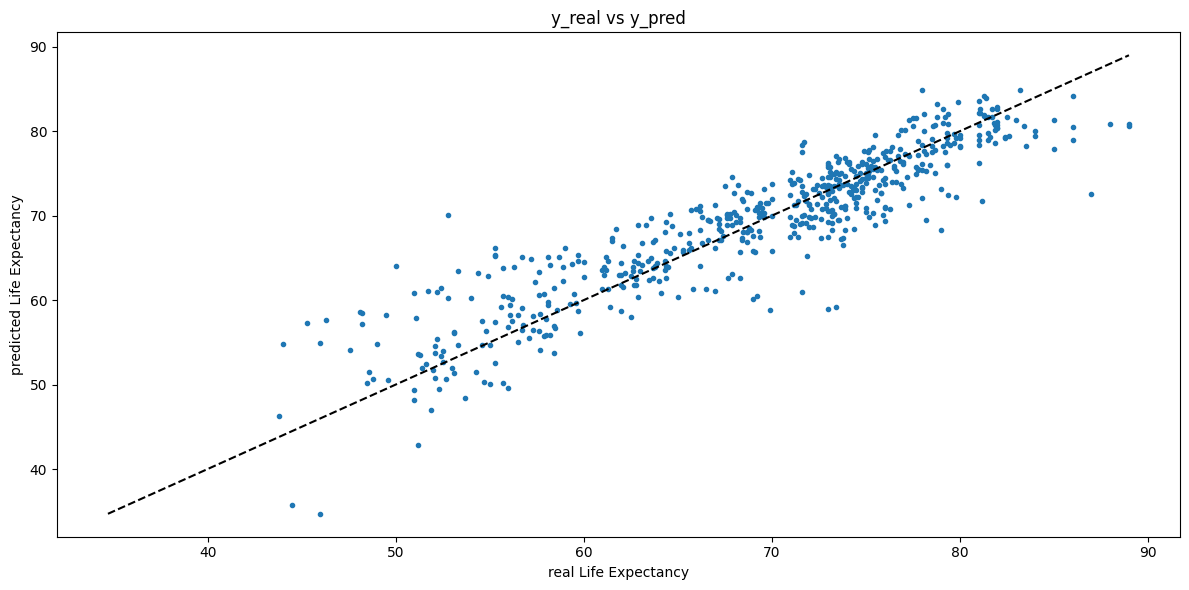

In [17]:
graph(y_test, y_pred_mlr)

- The linear model exhibits significant residual scattering, suggesting that some variance in Life Expectancy is not captured by the current features.

In [18]:
print("MSE_SVR: ", mse_mlr, "\n R2_SVR: ", r2_mlr)

MSE_SVR:  15.242936417631343 
 R2_SVR:  0.8240562394240225


- Mean Squared Error = 15.24
- R2 score = 82%

## Support Vector Regression

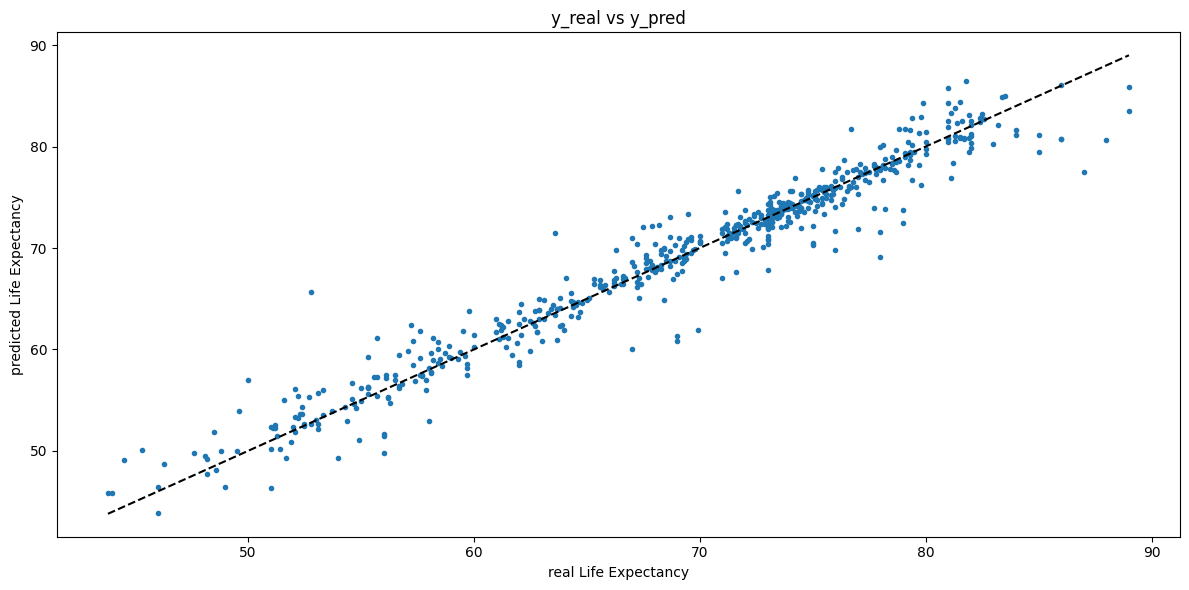

In [19]:
graph(y_test, y_pred_svr)

- The Support Vector Regression (SVR) shows better fit to the data, suggesting that variance in Life Expectancy is highly explained by the current features.

In [20]:
print("MSE_SVR: ", mse_svr, "\n R2_SVR: ", r2_svr)

MSE_SVR:  4.405316707496997 
 R2_SVR:  0.9491510056324404


- Mean Squared Error = 4.40
- R2 score = 94%

## Multiple Linear Regression Vs Support Vector Regression

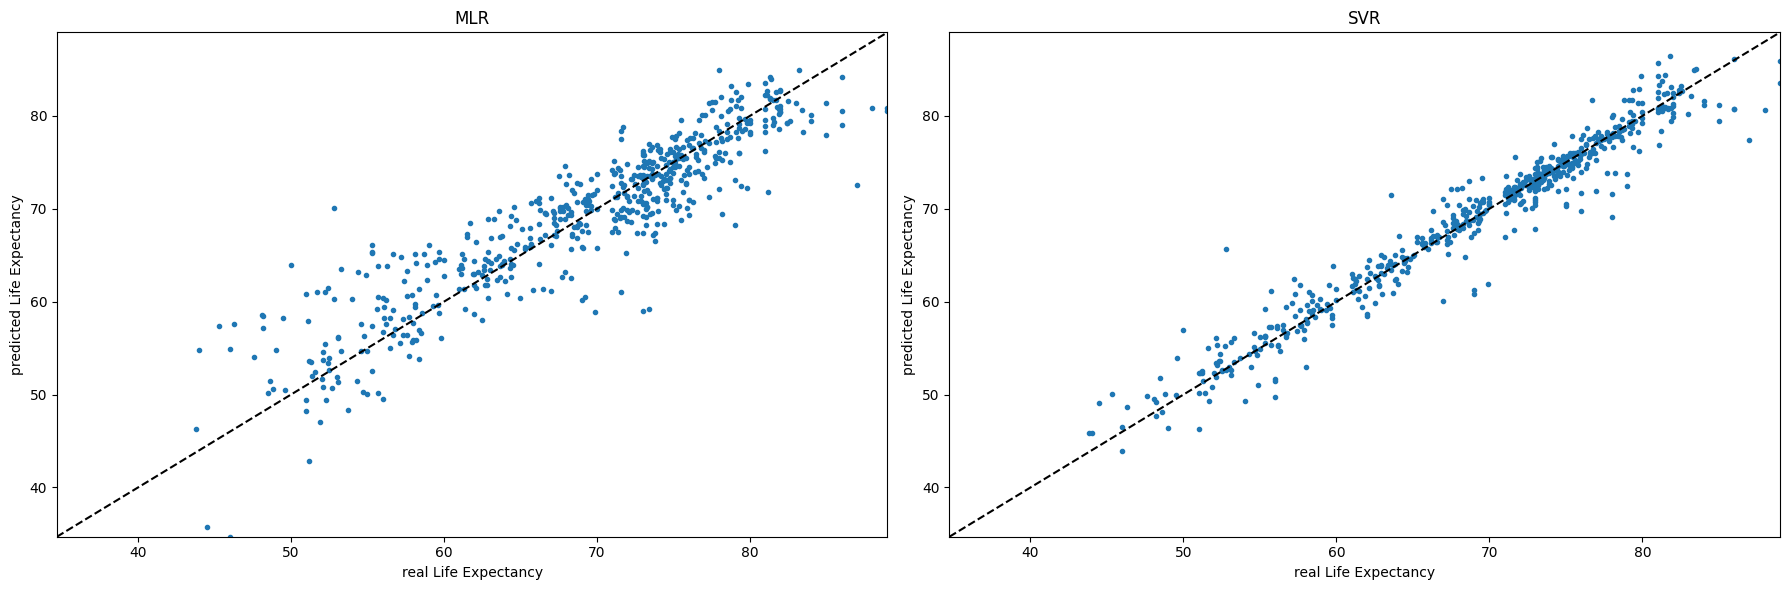

In [21]:
graph_svr_vs_mlr(y_test, y_pred_svr, y_pred_mlr)

In [22]:
print("MSE_MLR: ",mse_mlr, "\n R2_MLR", r2_mlr, "\n --------------------", "\n MSE_SVR: ", mse_svr, "\n R2_SVR: ", r2_svr)

MSE_MLR:  15.242936417631343 
 R2_MLR 0.8240562394240225 
 -------------------- 
 MSE_SVR:  4.405316707496997 
 R2_SVR:  0.9491510056324404


### Final Thoughts

 * The best-performing model is the Support Vector Regression (SVR), with a Mean Squared Error (MSE) of 15.34 years² and an R² score of 0.9491 (94.91%). This indicates that SVR fits the data better than the Multiple Linear Regression model in this scenery.